## Detecção de Fraudes em Cartões de Crédito - Parte 1
## * Entendimento do Negócio
## * Entendimento dos Dados
## Detecção de Fraudes em Cartões de Crédito - Parte 2
## * Preparação dos Dados
## * Modelagem
## * Validação


# PARTE 1

## Objetivo
O objetivo deste trabalho é de realizar uma análise descritiva dos dados de transações de cartões de créditos com indicação de fraudes. A análise desses dados servirá para o posterior desenvolvimento de um modelo de classificação que será capaz de identificar se uma transação é fraudulenta ou não. 

## Entendimento do Negócio
 O aumento no número de transações com cartões de crédito, principalmente no e-commerce, levou também ao crescimento na quantidade de fraudes. Sendo assim, com o grande volume de transações realizadas diariamente, um sistema robusto para predição e detecção desse tipo de crime pode auxiliar na redução do prejuízo e no aumento da confiança de bancos e emissores de cartões. Técnicas de Mineração de Dados e Inteligência Artificial surgiram como uma maneira de automatizar esse processo, treinando classificadores com dados de transações passadas para tentar prever fraudes futuras. 
Tendo em vista esse contexto, neste trabalho, foi realizada uma análise descritiva de uma base de dados com informações sobre transações de cartões de crédito, com o objetivo de posteriormente (parte 2) desenvolver um modelo para resolver o problema de classificação binária de detecção de fraudes em transações de cartões de crédito. 

In [ ]:
#Importando as bibliotecas necessárias
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel
from fast_ml.model_development import train_valid_test_split
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time
import matplotlib
import warnings
warnings.filterwarnings("ignore")

## Entendimento dos Dados

    O dataset utilizado (Credit Card Fraud) se encontra disponível na plataforma Kaggle (https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud) e apresenta dados de transações de cartões de crédito com identificação das operações fraudulentas. O dataset possui as seguintes variáveis:

    * distance_from_home - Distância de casa onde a transação ocorreu (variável contínua)

    * distance_fromlast_transaction - Distância da última transação que ocorreu (variável contínua)

    * ratioto_median_purchase_price - Razão entre o preço de compra da transação e o preço médio de compra (variável contínua)

    * repeat_retailer - Transação que aconteceu do mesmo varejista (variável categórica)
       1.0 - sim
       0.0 - não

    * used_chip - Transação feita através de chip físico (cartão de crédito) (variável categórica)
        1.0 - sim
        0.0 - não

    * usedpinnumber - Transação usando o número PIN (número de identificação pessoal) (variável categórica)
        1.0 - sim
        0.0 - não

    * online_order - Transação online (variável categórica)
        1.0 - sim
        0.0 - não

    * fraud - Transação fraudulenta (variável categórica)
        1.0 - sim
        0.0 - não


### Leitura do dataset e tratamento das variáveis

In [ ]:
# Lendo o dataset e identificando as variáveis categóricas
data = pd.read_csv('card_transdata.csv', dtype={
                    'repeat_retailer': 'category',
                    'used_chip': 'category',
                    'used_pin_number':'category',
                    'online_order':'category',
                    'fraud':'category',
                 }) 
#Dataset sem identificação das variáveis categóricas
data2 = pd.read_csv('card_transdata.csv')
data.head()

In [ ]:
# Visualizando informações sobre os dados pra ver se existem valores perdido ou anomalos e se os tipos de variáveis estão corretos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   distance_from_home              1000000 non-null  float64 
 1   distance_from_last_transaction  1000000 non-null  float64 
 2   ratio_to_median_purchase_price  1000000 non-null  float64 
 3   repeat_retailer                 1000000 non-null  category
 4   used_chip                       1000000 non-null  category
 5   used_pin_number                 1000000 non-null  category
 6   online_order                    1000000 non-null  category
 7   fraud                           1000000 non-null  category
dtypes: category(5), float64(3)
memory usage: 27.7 MB


In [ ]:
#Verificando se há valores nulos em alguma coluna
data.isnull().sum()
#A função acima devolve a soma dos valores nulos em cada coluna
#Como pode-se verificar, as colunas não apresentam valores nulos, por isso eles não precisam ser tratados


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
#Verificando se há valores divergentes (diferentes de 0.0 ou 1.0) nas variáveis categóricas
#No dataset utilizado as variáveis categóricas já vieram com os valores 0.0 e 1.0 atribuídos
#Se as categóricas estivessem com formato de string esses valores deveriam ser tratados com a função dummie
print(data['repeat_retailer'].unique())
print(data['used_chip'].unique())
print(data['used_pin_number'].unique())
print(data['online_order'].unique())

['1.0', '0.0']
Categories (2, object): ['0.0', '1.0']
['1.0', '0.0']
Categories (2, object): ['0.0', '1.0']
['0.0', '1.0']
Categories (2, object): ['0.0', '1.0']
['0.0', '1.0']
Categories (2, object): ['0.0', '1.0']


Como pode-se observar todas as variáveis categóricas apresentam somente valores 1.0 e 0.0, por isso, não será necessário tratar valores divergentes

In [ ]:
#Analisando as métricas das variáveis contínuas: valores max e min, média, desvio padrão, 1, 2 e 3 percentis
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


In [ ]:
#Analisando as métricas das variáveis categóricas : valor mais comun (top), frequência do valor mais comun (freq) e quantidade de valores únicos (unique)
data[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']].describe()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000,1000000,1000000,1000000,1000000
unique,2,2,2,2,2
top,1.0,0.0,0.0,1.0,0.0
freq,881536,649601,899392,650552,912597


### Análise das variáveis contínuas

In [ ]:
#Análise das variáveis contínuas
#Variável "distance_from_home"
data['distance_from_home'].describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

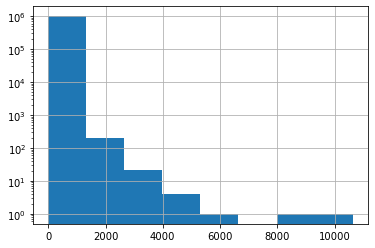

In [ ]:
#Plotando o histograma da variável'distance_from_home'
#Utilizou-se a escala logarítmica no eixo y para melhor visualização
data['distance_from_home'].hist(bins=8)
plt.yscale("log")
plt.show()


Como pode-se observar no histograma, a variável parece apresentar duas populações diferentes, ou seja, é uma variável bimodal. A seguir são apresentados os gráficos de boxplot dessa variável, com outliers e sem outliers

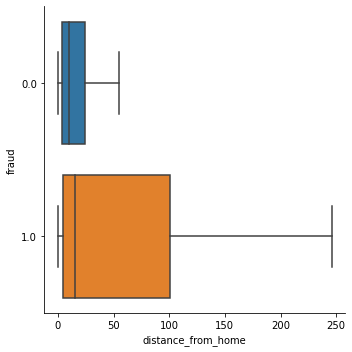

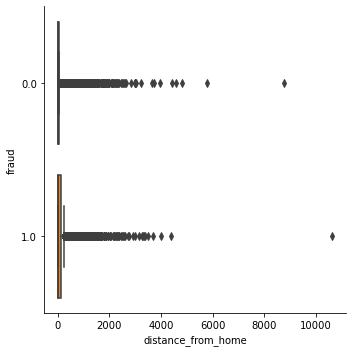

In [13]:
sns.catplot(data=data, x='distance_from_home',y='fraud', kind="box",showfliers = False)
sns.catplot(data=data, x='distance_from_home',y='fraud', kind="box")

In [ ]:
#Variável "distance_from_last_transaction"
data['distance_from_last_transaction'].describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

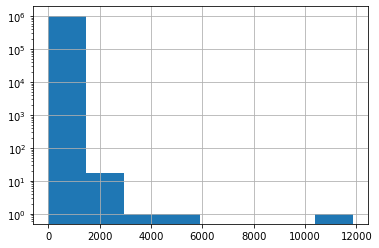

In [ ]:
#Histograma da variável 'distance_from_last_transaction'
#Utilizou-se a escala logarítmica no eixo y para melhor visualização
data['distance_from_last_transaction'].hist(bins=8)
plt.yscale("log")
plt.show()

Como pode-se observar no histograma, assim como no caso anterior, a variável parece apresentar duas populações diferentes, ou seja, é uma variável bimodal. A seguir são apresentados os gráficos de boxplot dessa variável, com outliers e sem outliers.

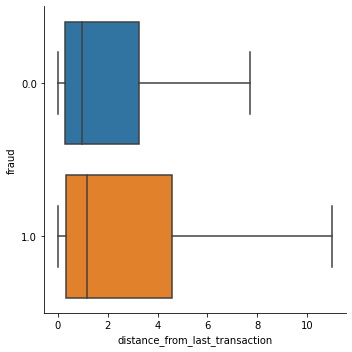

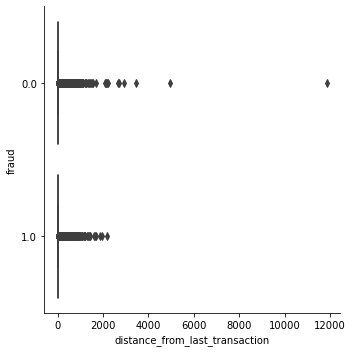

In [14]:
sns.catplot(data=data, x='distance_from_last_transaction',y='fraud', kind="box",showfliers = False)
sns.catplot(data=data, x='distance_from_last_transaction',y='fraud', kind="box")

In [ ]:
sns.boxplot(data=data2, x=data2['distance_from_last_transaction'],y=data2['fraud'], hue=data2['fraud'])

In [ ]:
#Variável "ratio_to_median_purchase_price"
data['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

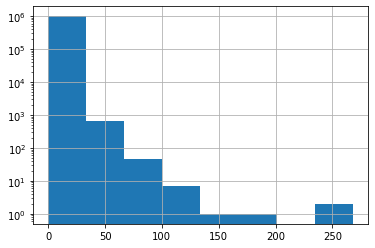

In [ ]:
#Histograma da variável'ratio_to_median_purchase_price'
#Utilizou-se a escala logarítmica no eixo y para melhor visualização
data['ratio_to_median_purchase_price'].hist(bins=8)
plt.yscale("log")
plt.show()


Como pode-se observar no histograma, assim como no caso anterior, a variável parece apresentar duas populações diferentes, ou seja, é uma variável bimodal. A seguir são apresentados os gráficos de boxplot dessa variável, com outlierse sem outliers.

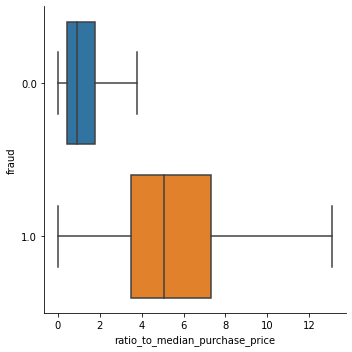

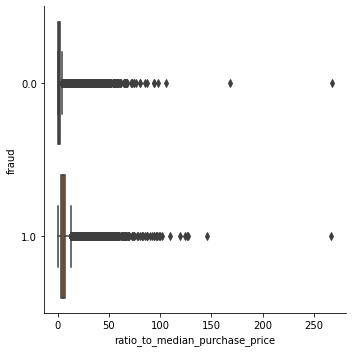

In [15]:
sns.catplot(data=data, x='ratio_to_median_purchase_price',y='fraud', kind="box",showfliers = False)
sns.catplot(data=data, x='ratio_to_median_purchase_price',y='fraud', kind="box")

Para ajudar nas visualizações realizou-se a plotagem em pares das variáveis contínuas, agora identificando em cada uma as populações de "fraude" e de "não fraude"

In [ ]:
#Renomeou-se as variáveis contínuas e ajustou-se para a escala logarítmica para a melhor visualização
data['Log_home'] = np.log10(data['distance_from_home'])
data['Log_trans'] = np.log10(data['distance_from_last_transaction'])
data['Log_ratio'] = np.log10(data['ratio_to_median_purchase_price'])

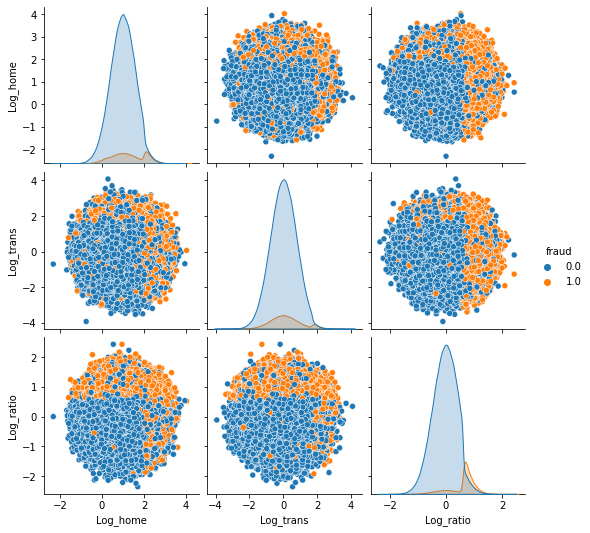

In [ ]:
sns.pairplot(data=data[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

Mais uma vez é possível notar, assim como nos histogramas, que há um comportamento bimodal em todas as variáveis contínuas, no entanto, com essa plotagem foi possível perceber que o comportamento bimodal está presente nas transações fraudulentas enquanto que as transações normais são unimodais.

### Análise das variáveis categóricas

<AxesSubplot:ylabel='fraud'>

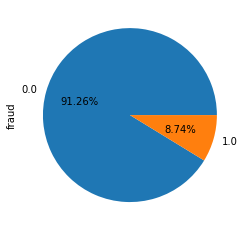

In [ ]:
#Análise das variáveis categóricas
#Variável "fraud" = variável alvo da análise
#Analisando a porcentagem de transações que foram consideradas como fraude
data['fraud'].value_counts().plot(kind = 'pie',  autopct='%1.2f%%')


Como podemos observar no gráfico de pizza, a quantidade de transações consideradas como fraude foi de aproximadamente 8.7%

In [ ]:
#Análise da variável "repeat_retalier"
#Vendo a quantidade de dados 
data['repeat_retailer'].value_counts()


1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

<AxesSubplot:xlabel='repeat_retailer', ylabel='count'>

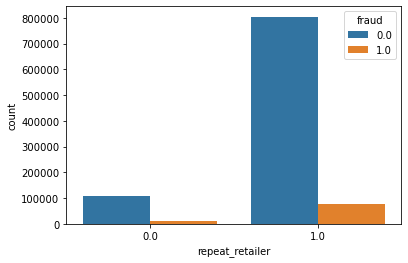

In [ ]:
#Plotando gráfico de barras da variável e comparando com a variável alvo : 'fraud'
sns.countplot(x='repeat_retailer', hue='fraud', data=data)


Como pode-se observar no gráfico de barras, há uma quantidade muito maior de transações que ocorreram na mesma loja (1.0) e ao comparar com a quantidade de fraudes detectadas (1.0) pode-se observar que mais operações fraudulentas também ocorreram nas mesmas lojas. No entanto é necessário analisar mais essa variávl antes de chegar a uma conclusão

In [ ]:
#Análise da variável "used_chip"
#Vendo a quantidade de dados 
data['used_chip'].value_counts()


0.0    649601
1.0    350399
Name: used_chip, dtype: int64

<AxesSubplot:xlabel='used_chip', ylabel='count'>

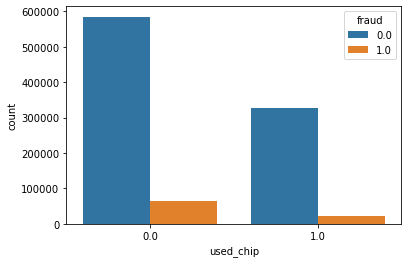

In [ ]:
#Plotando gráfico de barras da variável e comparando com a variável alvo : 'fraud'
sns.countplot(x='used_chip', hue='fraud', data=data)

Analisando-se agora a variável 'used_chip' pode-se observar que no a maior quantidade de transações analisadas não foram feitas com cartão de crédito físico (0.0), ou seja, com chip. E nesse caso mais transações fraudulentas também foram realizadas sem a utilização de cartão físico.

In [ ]:
#Análise da variável "used_pin_number"
#Vendo a quantidade de dados 
data['used_pin_number'].value_counts()

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

<AxesSubplot:xlabel='used_pin_number', ylabel='count'>

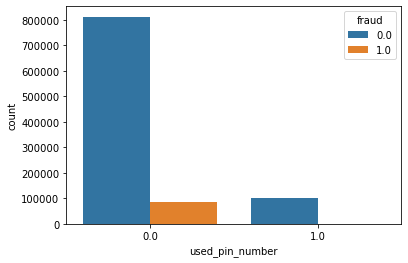

In [ ]:
#Plotando gráfico de barras da variável "used_pin_number" e comparando com a variável alvo : 'fraud'
sns.countplot(x='used_pin_number', hue='fraud', data=data)


Analisando-se a variável 'used_chip' pode-se observar que a maior quantidade de transações analisadas não foi feita através do PIN e que nesse caso mais operações fraudulentas foram realizadas sem a utilização do PIN. O gráfico não permite uma boa visualização da variável 'fraud' mas isso pode ser ajustado utilizando-se uma escala logarítmica como mostra o gráfico a seguir

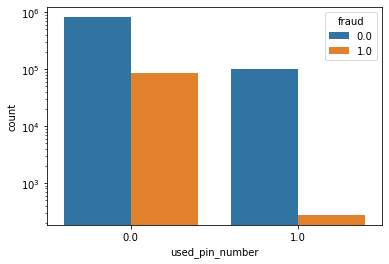

In [ ]:
#Plotando gráfico de barras da variável "used_pin_number" e comparando com a variável alvo : 'fraud', utilizando escala log
sns.countplot(x='used_pin_number', hue='fraud', data=data)
plt.yscale("log")
plt.show()


In [ ]:
#Análise da variável "online_order"
#Vendo a quantidade de dados 
data['online_order'].value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

<AxesSubplot:xlabel='online_order', ylabel='count'>

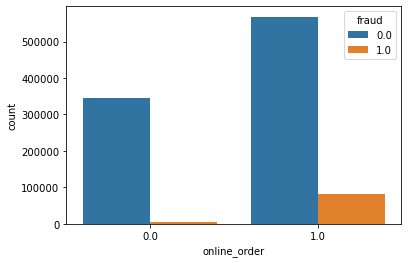

In [ ]:
#Plotando gráfico de barras da variável "used_pin_number" e comparando com a variável alvo : 'fraud'
sns.countplot(x='online_order', hue='fraud', data=data)

Analisando-se a variável 'online_order' por meio do gráfico de barras pode-se observar que a maior quantidade de transações realizadas foi de forma online e que nesse caso mais operações fraudulentas também foram realizadas em transações online

### Seleção das variáveis

Após a exploração inicial dos dados, limpeza e adequação do dataset, é necessário realizar a seleção de atributos que irão fazer parte do modelo de classificação. A seleção de atributos serve para remover preditores redundantes ou não-informativos do modelo. Para isso serão realizados dois métodos difentes, um para as variáveis contínuas e um para as variáveis categóricas. 

### Seleção das variáveis contínuas

Para as variáveis contínuas será utilizado o Coeficiente de Correlação. Por esse motivo foi gerada a matriz de correlação das variáveis abaixo

<AxesSubplot:>

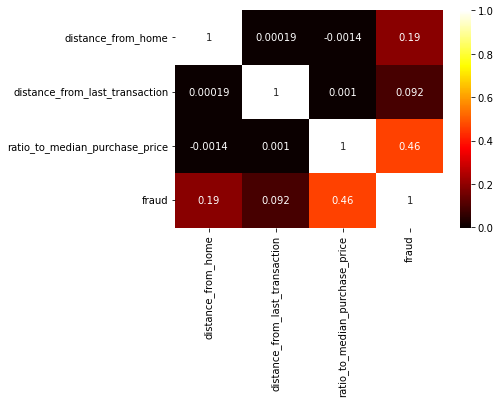

In [ ]:
#Matriz de correlação para selecionar variáveis contínuas
data_corr = data2.drop(['repeat_retailer','used_chip','used_pin_number', 'online_order'], axis=1)
corr = data_corr.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

Como pode-se observar na matriz, as variáveis contínuas que apresentam maiores índices de correlação com a variável target de saída (fraud) são as variáveis : 'distance_from_home' e 'radio_to_median_purchase_price' e por esse motivo essas variáveis serão selecionadas para o modelo que será realizado. A variável 'distance_from_last_transaction' apresentou correlação muito fraca e poderá ser descartada dependendo das outras análises que serão feitas na estapa de modelagem

### Seleção das variáveis categóricas

Para as variáveis categóricas foi utilizado o Teste Qui-Quadrado para a seleção

In [8]:
# Split dataset
X = data2.drop(['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','fraud'], axis=1)
y = data2['fraud']

# Calculando Chi-Quadrado
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

# Resultados
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})



,Chi2,p-Value
repeat_retailer,0.218290,0.640346
used_chip,2415.152567,0.000000
used_pin_number,9046.618108,0.000000
online_order,12878.364170,0.000000


Com os resultados do teste Chi2 apresentados na tabela e assumindo-se um nível de significância de 0.05 foi possível concluir que todas as variáveis categóricas analisadas são estatisticamente significativas e portanto deverão fazer parte do modelo.

# PARTE 2

## Objetivo
O objetivo da segunda parte deste trabalho é de realizar a modelagem do problema de classificação de detecção de fraudes em cartões de crédito, utilizando para isso diferentes modelos, fazer a escolha das métricas adequadas para o problema e por fim avaliar os modelos utilizados de acordo com o problema proposto.

### Análise de Distribuição do Dataset

Primeiramente analisou-se o dataset para avaliar o balanceamento do mesmo e decidir qual métrica deveria ser utilizada para a avaliação dos modelos propostos. Como pode-se observar, na análise feita abaixo, a maioria dos dados do dataset não são fraudes, as fraudes representam apenas 8.74% dos dados e portanto o dataset utilizado é desbalanceado.

Não fraudes representam 91.26 % do dataset
Fraudes representam 8.74 % do dataset


<AxesSubplot:ylabel='None'>

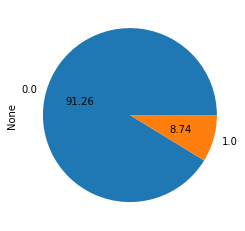

In [19]:
print('Não fraudes representam', round(data['fraud'].value_counts()[0]/len(data) * 100,2), '% do dataset')
print('Fraudes representam', round(data['fraud'].value_counts()[1]/len(data) * 100,2), '% do dataset')
data.value_counts("fraud").plot.pie(autopct = "%.2f")


fraud
0.0    912597
1.0     87403
dtype: int64

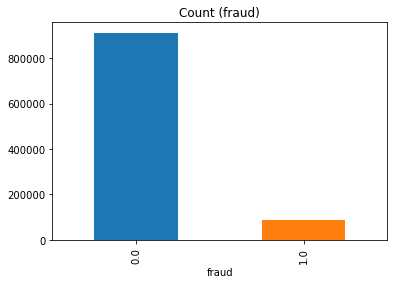

In [20]:
# Distribuição da variável target (fraud)
# fraud = 0.0 significa uma transação não fraudulenta 
# fraud= 1.0 significa uma transação fraudulenta
data.value_counts("fraud").plot(kind='bar', title='Count (fraud)', color = ['#1F77B4', '#FF7F0E'])
data.value_counts("fraud")

A seguir realizou-se a separação do dataset original entre treino e teste para a validação dos modelos. Inicialmente utilizou-se o método de hold out e o dataset foi dividido em 80% para treino e 20% para teste.

Inicialmente dividiu-se o dataset original em 3 partes: treino(80%), validação(10%) e teste(10%).

In [4]:
# Dividindo o dataset original (data2) na proporção 80:10:10 para treino:validação:teste
#Separando a variável target "fraud" das features
#Variável target
X = data2.drop('fraud', axis=1)
#Features
y = data2['fraud']
# Primeiramente o dataset foi dividido entre treino e dados remanescentes
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=1)
#Depois os dados remanescentes foram divididos entre validação e teste 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(800000, 7)
(800000,)
(100000, 7)
(100000,)
(100000, 7)
(100000,)


### Equalização do Dataset (Undersampling)

Tendo em vista que o problema possui o dataset original desbalanceado, se esse dataset fosse utilizado nas modelagens preditivas poderia ocasionar erros. A motivo é que a classe de interesse é minoritária e se não for tratado os modelos de classificação irão assumir que na maioria dos casos não há fraude (overfitting). 
Para resolver esse problema criou-se um novo dataset balanceado, com a mesma proporção entre fraudes e não fraudes. Para isso, inicialmente aplicou-se o método que diminui a quantidade de observações que não são fraudes (undersampling).


0.0    69786
1.0    69786
Name: fraud, dtype: int64


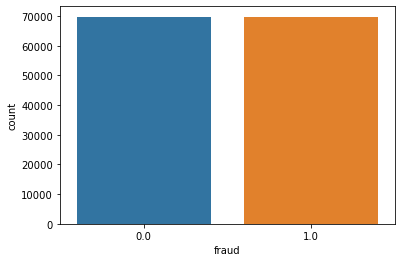

In [6]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_under).value_counts())
# plotar a nova distribuição de classes
sns.countplot(y_under);

### Equalização do Dataset (Oversampling)

Também utilizou-se o método de Oversampling que replica as observações de fraude que consistem na menor parte do dataset.

0.0    730214
1.0    730214
Name: fraud, dtype: int64


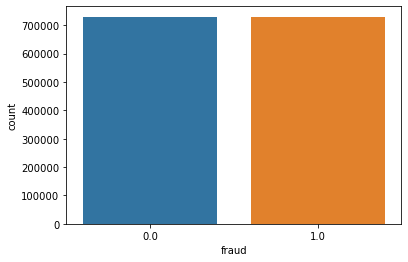

In [7]:
# usar técnica under-sampling
rus = RandomOverSampler()
X_over, y_over = rus.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_over).value_counts())
# plotar a nova distribuição de classes
sns.countplot(y_over);

### Modelagem

Depois de realizada a análise da distribuição dos dados e o balanceamento dos mesmos, partiu-se para a etapa de modelagem. Nessa etapa foram utilizados diferentes algoritmos de modelagem preditiva para resolver o problema de classificação proposto.

### Modelo de Regressão Logística

#### Aplicando o modelo de Regressão Logística no dataset original (Desbalanceado)

Primeiramente aplicou-se o modelo de regressão logística no dataset desbalanceado. Para isso utilizou-se a biblioteca de aprendizado de máquina do Python, a scikit-learn.

Após o treinamento e a predição com base no modelo de regressão, imprimiu-se o relatório de classificação e a matriz de confusão, como pode-se observar abaixo. 
A avaliação do desempenho do modelo é feita com base nas métricas extraídas da matriz de confusão, essas métricas são apresentadas no relatório de classificação. Como o problema analisado apresenta um dataset desbalanceado, a acurácia, que é uma métrica bastante utilizada na avaliação de modelos, não é a melhor escolha. Portanto, para o problema de detecção de fraudes, utilizou-se como métrica o F1-score, uma vez que se deseja que o modelo seja tanto sensível quanto preciso e também levou-se em consideração a métrica de Recall, uma vez que a classe de interesse é a classe minoritária.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9632    0.9928    0.9778     91216
         1.0     0.8904    0.6056    0.7209      8784

    accuracy                         0.9588    100000
   macro avg     0.9268    0.7992    0.8493    100000
weighted avg     0.9568    0.9588    0.9552    100000

Acurácia: 0.9588

AUC: 0.7992



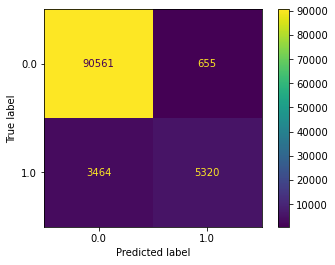

In [20]:
# Instanciando o modelo de Regressão Logística
model_res = LogisticRegression()
#Treinando o modelo de Regressão Logística na base de treino
model_res.fit(X_train, y_train)
# Fazendo as predições em cima dos dados de validação
y_pred_res = model_res.predict(X_valid)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_res)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_valid, y_pred_res, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_pred_res)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_pred_res)))

#### Aplicando o modelo de Regressão Logística no dataset balanceado (Undersampling)

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9951    0.9312    0.9621     91216
         1.0     0.5715    0.9525    0.7144      8784

    accuracy                         0.9331    100000
   macro avg     0.7833    0.9419    0.8383    100000
weighted avg     0.9579    0.9331    0.9404    100000

Acurácia: 0.9331

AUC: 0.9419



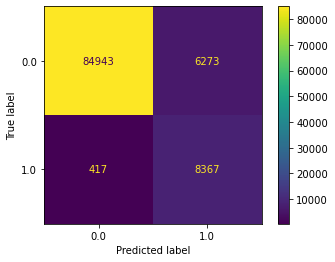

In [21]:
#Treinando o modelo de Regressão Logística na base de treino
model_res.fit(X_under, y_under)
# Fazendo as predições em cima dos dados de validação
y_pred_under = model_res.predict(X_valid)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_under)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_valid, y_pred_under, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_pred_under)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_pred_under)))

Nesse caso pode-se observar que para o dataset balanceado (undersampling) houve uma pequena diminuição na métrica de F1, mas houve aumento significativo no recall e diminuição significativa na precisão do modelo.

#### Aplicando o modelo de Regressão Logística no dataset balanceado (Oversampling)

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9944    0.9342    0.9633     91216
         1.0     0.5802    0.9449    0.7189      8784

    accuracy                         0.9351    100000
   macro avg     0.7873    0.9395    0.8411    100000
weighted avg     0.9580    0.9351    0.9418    100000

Acurácia: 0.9351

AUC: 0.9395



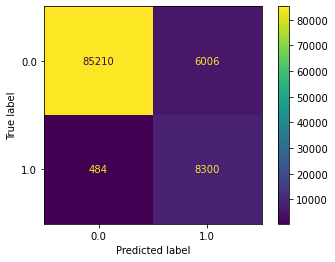

In [22]:
#Treinando o modelo de Regressão Logística na base de treino
model_res.fit(X_over, y_over)
# Fazendo as predições em cima dos dados de validação
y_pred_over = model_res.predict(X_valid)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_over)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_valid, y_pred_over, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_pred_over)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_pred_over)))

Nesse caso, houve um pequeno aumento no F1-score comparado com o modelo undersampling, mas assim como no caso anterior, comparado ao modelo com dados desbalanceados o F1 para a classe de interesse é menor, o recall é maior e a precisão é menor.Para o problema de detecção de fraudes, um falso negativo ocasionaria um problema maior que um falso positivo. Portanto, tendo em vista que os modelos apresentaram métricas F1 com pouco variação, escolheu-se o modelo com o maior Recall para proseguir, que no caso é o modelo balanceado por oversampling. Mas antes disso realizou-se a seleção de hiperparâmetros para o modelo.

####  Regressão Logística - Seleção de Hiperparâmetros

Nessa etapa foi realizada a seleção de hiperparâmetros. O objetivo dessa seleção é de selecionar os melhores parâmetros para o algoritmo, melhorando a performance do modelo preditivo. Para isso utilizou-se a função GridSearchCV. No caso do modelo de Regressão Logística, os parâmetros análisados foram o 'penalty'(variado entre l1 e l2) que se trata da penalidade do modelo e o 'C' que se trata do inverso da força de regularização.

In [25]:
# Especificando o modelo
lr = LogisticRegression(solver='lbfgs')

# Intanciando o GridSearchCV e os parâmetros a serem variados
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10], 'penalty':['l1','l2']})
searcher.fit(X_valid, y_valid)

# Report dos melhores parâmetro
print("Melhores parâmetros", searcher.best_params_)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Numero total de features:", coefs.size)
print("Numero de features selecionadas:", np.count_nonzero(coefs))

Melhores parâmetros {'C': 10, 'penalty': 'l2'}
Numero total de features: 7
Numero de features selecionadas: 7


#### Aplicando o modelo de Regressão Logística na base de teste

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9947    0.9336    0.9632     91167
         1.0     0.5806    0.9485    0.7203      8833

    accuracy                         0.9349    100000
   macro avg     0.7876    0.9411    0.8417    100000
weighted avg     0.9581    0.9349    0.9417    100000

Acurácia: 0.9349

AUC: 0.9411



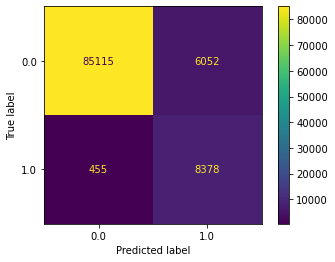

In [24]:
model_res = LogisticRegression(penalty='l2', C=10)
#Treinando o modelo de Regressão Logística na base de treino
model_res.fit(X_over, y_over)
# Fazendo as predições em cima dos dados de teste
y_pred_over = model_res.predict(X_test)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_over)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_over, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_over)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_over)))

Como pode-se observar, para o teste do modelo com os hiperparâmetros selecionados houve um aumento no F1 Score do modelo.

### Modelo de Regressão Logística Retirando Variáveis 

Afim de melhoras o F1 score e Recall do modelo, retirou-se a variável 'distance_from_last_transaction', que apresentou baixa correlação com a variável target, e treinou-se o modelo novamente para avaliar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9916    0.9213    0.9552     91167
         1.0     0.5309    0.9196    0.6732      8833

    accuracy                         0.9211    100000
   macro avg     0.7613    0.9205    0.8142    100000
weighted avg     0.9509    0.9211    0.9303    100000

Acurácia: 0.9211

AUC: 0.9205



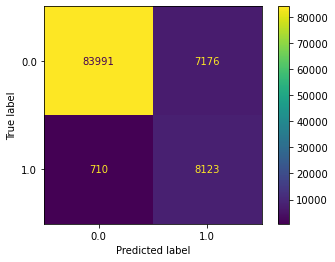

In [26]:
# Retirando a variável 'distance_from_last_transaction'
model_res.fit(X_over.drop('distance_from_last_transaction', axis=1), y_over)
# Fazendo as previsões em cima da base de testes oversampling
y_pred_over1 = model_res.predict(X_test.drop('distance_from_last_transaction', axis=1))
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_over1)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_over1, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_over1)))
# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_over1)))


Como pode-se observar, a retirada da variável 'distance_from_last_transaction' diminuiu o F1 Score do modelo para 67,32%, por isso a variável foi mantida.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9946    0.9332    0.9629     91167
         1.0     0.5789    0.9472    0.7186      8833

    accuracy                         0.9345    100000
   macro avg     0.7867    0.9402    0.8408    100000
weighted avg     0.9578    0.9345    0.9413    100000

Acurácia: 0.9345

AUC: 0.9402



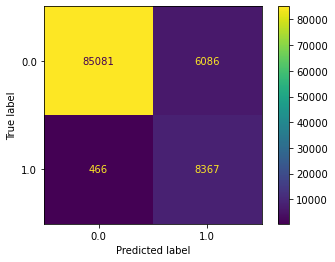

In [28]:
# Retirando a variável 'repeat_retailer'
model_res.fit(X_over.drop('repeat_retailer', axis=1), y_over)
# Fazendo as previsões em cima da base de testes oversampling
y_pred_over2 = model_res.predict(X_test.drop('repeat_retailer', axis=1))
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_over2)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_over2, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_over2)))
# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_over2)))

Retirando-se a variável categórica 'repeat_retailer', que apresentou coeficiente qui-quadrado baixo, também obteve-se um menor F1 Score (71,86%) comparado ao modelo oversampling com todas as variáveis (72,03%) e por esse motivo a variável foi mantida.

Após a retirada das variáveis que apresentaram menor correlação e a reaplicação do modelo pode-se observar que essas variáveis são importantes e que influenciam no F1 Score do modelo, por esse motivo as variáveis foram mantidas para o modelo de regressão e para as próximas análises.

### Modelo de Floresta de Árvores de Decisão Aleatória

Utilizou-se também o algoritmo de Floresta de Árvores de Decisão Aleaória. Esse algoritmo ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o overfitting. É um algoritmo muito utilizado para problemas com dados desbalanceados. Inicialmente para o modelo utilizou-se 10 árvores e profundidade 5.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     1.0000    0.9824    0.9911     91216
         1.0     0.8456    1.0000    0.9163      8784

    accuracy                         0.9840    100000
   macro avg     0.9228    0.9912    0.9537    100000
weighted avg     0.9864    0.9840    0.9846    100000

Acurácia: 0.9840

AUC: 0.9912



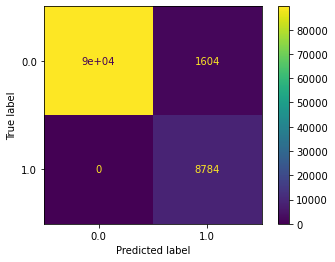

In [31]:
# Instanciando modelo de árvore de decisão e treinando na base oversampling
rfc = RandomForestClassifier(n_estimators=10, max_depth=5).fit(X_over, y_over)
# Realizando predição no modelo na base de validação
y_rfc_pred = rfc.predict(X_valid)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_valid, y_rfc_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_valid, y_rfc_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_rfc_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_rfc_pred)))

### Floresta de Árvores de Decisão Aleatórias - Seleção de Hiperparâmetros

Assim como no modelo anterior também utilizou-se a função GridSearchCV para a seleção dos hiperparâmetros para o modelo, os parâmetros analisados foram o 'n_estimators', que se trata do número de árvores da floresta, o 'max_features', que se trata do número de de recursos a serem considerados ao procurar o melhor slip, o 'max_depth' que se trata da profundidade da árvore e o 'criterion', que se trata da função para medir a qualidade de uma divisão. Assim como no modelo anterior, utilizou-se 5 folds na validação em busca dos parâmetros e os dados utilizados nessa etapa foram os dados da base de validação.

In [10]:
# Especificando o modelo
rfc_sh=RandomForestClassifier()
# Intanciando o GridSearchCV e os parâmetros a serem variados
param_grid = { 
    'n_estimators': [2,10,20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc_sh, param_grid=param_grid)
CV_rfc.fit(X_valid, y_valid)
# Report dos melhores parâmetro
print("Melhores parâmetros", CV_rfc.best_params_)

Melhores parâmetros {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 20}


### Aplicando o modelo de Florestas de Árvores de Decisão na base de testes

Após encontrar os hiperparâmetros do modelo, realizou-se o treino mais uma vez na base de treino com esses parâmetros e aplicou-se a predição na base de testes. Como pode-se obervar, com os melhores parâmetros o modelo de Floresta de Árvores de Decisão atingiu 100% de F1 score.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000     91167
         1.0     1.0000    1.0000    1.0000      8833

    accuracy                         1.0000    100000
   macro avg     1.0000    1.0000    1.0000    100000
weighted avg     1.0000    1.0000    1.0000    100000

Acurácia: 1.0000

AUC: 1.0000



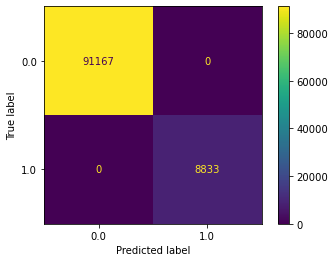

In [15]:
# Instanciando modelo de árvore de decisão com os hiperparametros e treinando na base oversampling
rfc = RandomForestClassifier(criterion="entropy", max_depth=8, max_features="auto", n_estimators=20).fit(X_over, y_over)
# Realizando predição na base de testes
y_rfc_pred = rfc.predict(X_test)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_rfc_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_rfc_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_rfc_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_rfc_pred)))

Para esse modelo também realizou-se a análise da importancia das features, como mostra o gráfico abaixo. Como pode-se observar, a feature mais importante para o problema é a 'ratio_to_median_purchase price' que representa a razão entre o preço de compra da transação e o preço médio de compra.

<AxesSubplot:title={'center':'Feature Importance'}>

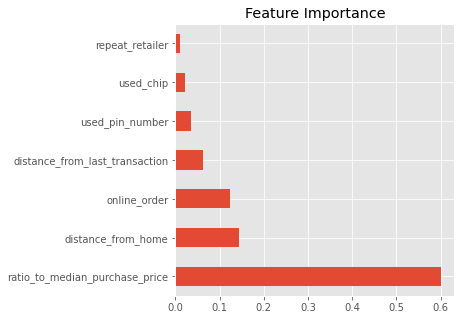

In [34]:
rfc.feature_importances_  
model = SelectFromModel(rfc, prefit=True)
test_X_new = model.transform(X_test)

matplotlib.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(rfc.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh',title = 'Feature Importance')

### Modelo de Florestas de Árvore de Decisão Retirando Variáveis 

Assim como no modelo de Regressão Logística, retirou-se as variáveis que apresentaram baixa correlação com a variável target e aplicou-se novamente o modelo de Floresta de Árvores de Decisão. Como pode-se observar a retirada da variável 'distance_from_last_transaction' ocasionou em uma redução de ~4% no F1 score e a retirada da variável 'repeat_retailer' gerou apenas 1 erro a mais na classe de interesse, de acordo com a matriz de confusão. Por esse motivo todas as variáveis foram mantidas no modelo.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9936    1.0000    0.9968     91167
         1.0     0.9999    0.9340    0.9658      8833

    accuracy                         0.9942    100000
   macro avg     0.9968    0.9670    0.9813    100000
weighted avg     0.9942    0.9942    0.9941    100000

Acurácia: 0.9942

AUC: 0.9670



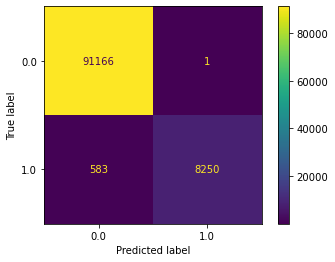

In [8]:
# Retirando a variável 'distance_from_last_transaction'
rfc = RandomForestClassifier(criterion="entropy", max_depth=8, max_features="auto", n_estimators=20).fit(X_over.drop('distance_from_last_transaction', axis=1), y_over)
# Realizando predição no modelo
y_rfc_pred = rfc.predict(X_test.drop('distance_from_last_transaction', axis=1))
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_rfc_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_rfc_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_rfc_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_rfc_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000     91167
         1.0     1.0000    0.9999    0.9999      8833

    accuracy                         1.0000    100000
   macro avg     1.0000    0.9999    1.0000    100000
weighted avg     1.0000    1.0000    1.0000    100000

Acurácia: 1.0000

AUC: 0.9999



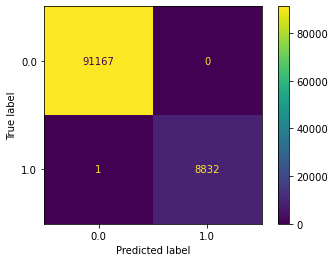

In [9]:
# Retirando a variável 'repeat_retailer'
rfc = RandomForestClassifier(criterion="entropy", max_depth=8, max_features="auto", n_estimators=20).fit(X_over.drop('repeat_retailer', axis=1), y_over)
# Realizando predição no modelo
y_rfc_pred = rfc.predict(X_test.drop('repeat_retailer', axis=1))
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_rfc_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_rfc_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_rfc_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_rfc_pred)))

### Modelo de Redes Neurais

Para essa modelagem utilizou-se o algoritmo Multilayer Perceptron (MLP) da biblioteca de redes neurais do scikit-learn. O MLP é um modelo de rede neural artificial que mapeia conjuntos de dados de entrada para um conjunto de saídas apropriadas. Um MLP consiste em várias camadas que estão conectadas a camada seguinte. Os nós das camadas são neurônios com funções de ativação não lineares, exceto os nós da camada de entrada. Entre a camada de entrada e a camada de saída pode haver uma ou mais camadas ocultas não lineares. No teste inicial, mostrado abaixo utilizou-se 2 camadas com 10 neurônios em cada e 200 epochs.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     1.0000    0.9940    0.9970     91216
         1.0     0.9415    0.9995    0.9696      8784

    accuracy                         0.9945    100000
   macro avg     0.9707    0.9968    0.9833    100000
weighted avg     0.9948    0.9945    0.9946    100000

Acurácia: 0.9945

AUC: 0.9968



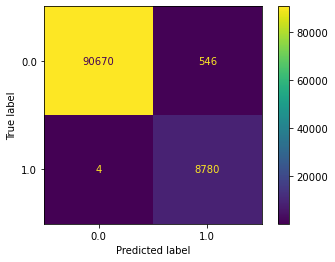

In [11]:
# Instanciando modelo redes neurais (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10),
                        max_iter = 200,activation = 'relu',
                        solver = 'adam')
#Treinando o modelo
mlp_clf.fit(X_over, y_over)
#Realizando a predição
y_mlp_pred = mlp_clf.predict(X_valid)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_valid, y_mlp_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_valid, y_mlp_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_mlp_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_mlp_pred)))

### Redes Neurais - Seleção de Hiperparâmetros

Assim como nos outros modelos também utilizou-se a função GridSearchCV para a seleção dos hiperparâmetros, os parâmetros analisados foram o 'hidden_layer_sizes', que consiste no número camadas e na quantidade de neurônios em cada camada, o 'max_iter', que consiste no número de epochs, o 'activation' que consiste na função de ativação das camadas do modelo e o 'solver' que consiste no parâmetro para otimização do peso da rede. Assim como no modelo anterior, utilizou-se 5 folds na validação em busca dos parâmetros e os dados utilizados nessa etapa foram os dados da base de validação.

In [13]:
# Especificando o modelo
mlp_sh = MLPClassifier()
# Intanciando o GridSearchCV e os parâmetros a serem variados
param_grid = { 
    'hidden_layer_sizes': [(10,10), (10,10,10), (20,20), (20,20,20), (20,40)],
    'max_iter': [10,100,200,300],
    'activation': ["logistic", "relu", "Tanh"],
    'solver' :['adam','lbfgs']
}
CV_mlp = GridSearchCV(estimator=mlp_sh, param_grid=param_grid)
CV_mlp.fit(X_valid, y_valid)
# Report dos melhores parâmetro
print("Melhores parâmetros", CV_mlp.best_params_)

Melhores parâmetros {'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'max_iter': 300, 'solver': 'adam'}


### Aplicando o modelo de Redes Neurais na base de testes

Após encontrar os hiperparâmetros do modelo, realizou-se o treino mais uma vez na base de treino com esses parâmetros e aplicou-se a predição na base de testes. Como pode-se obervar, com os melhores parâmetros o modelo de Redes Neurais atingiu 99.11% de F1 score.

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     1.0000    0.9983    0.9991     91167
         1.0     0.9826    0.9997    0.9911      8833

    accuracy                         0.9984    100000
   macro avg     0.9913    0.9990    0.9951    100000
weighted avg     0.9984    0.9984    0.9984    100000

Acurácia: 0.9984

AUC: 0.9990



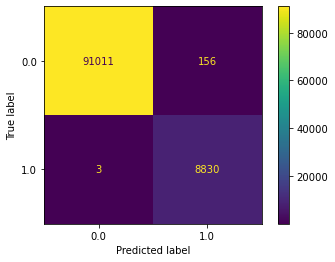

In [14]:
# Instanciando modelo redes neurais (MLP)
mlp_clf = MLPClassifier(activation='relu', hidden_layer_sizes=(20, 20, 20), max_iter=300,solver='adam')
#Treinando o modelo
mlp_clf.fit(X_over, y_over)
#Realizando a predição
y_mlp_pred = mlp_clf.predict(X_test)
# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_mlp_pred)
# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_mlp_pred, digits=4))
# Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_mlp_pred)))
# Imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_mlp_pred)))

### Conclusão

Tendo em vista o problema de classificação de transações fraudulentas em cartões de crédito e o dataset utilizado, que se trata de um dataset desbalanceado, foi necessário utilizar técnicas para balanceamento do dataset. Entre as técnicas aplicadas (undersampling e oversampling), a técnica de oversampling foi a que apresentou os melhores resultados, por isso foi utilizada no resto dos modelos.
Na etapa de modelagam foram utilizados três modelos diferentes: o modelo de Regressão Logística, o de Florestas de Árvores de Decisão Aleatórias e o de Redes Neurais. Para a avaliação do desempenho desses modelos utilizou-se a matriz de confusão e selecionou-se a métrica de F1 Score, que é a que melhor se adequa ao problema proposto tendo em vista que busca-se um modelo tanto preciso quanto sensível.
Os modelos foram treinados e testados utilizando-se primeiramente todas as variáveis e depois retirou-se as variáveis que apresentaram menor correlação (na Etapa 1 do projeto). A retirada das variáveis, no entanto, ocasionou na queda do F1 Score, sendo assim, essas variáveis foram mantidas. 
Na etapa de testes dos modelos utilizou-se a técnica de hold-out para a divisão do dataset entre treino(80%), validação(10%) e teste(10%).Também foi realizada a seleção de hiperparâmetros para todos os modelos utilizando-se a base de validação e posteriormente os modelos foram testados na base de testes já com esses parâmetros definidos.
Por fim, dentre os modelos analisados, o que apresentou o melhor desempenho foi o modelo de Florestas de Árvores de Decisão, chegando ao F1 Score de 100%. O modelo de Redes Neurais também apresentou F1 Score alto (99.11%), no entanto, para chegar nesse score foi necessário utilizar várias camadas e vários nós, o que tornou o algoritmo muito lento. O modelo de Regressão Logística foi o que apresentou o pior F1 score (72.05%) mostrando que não é um modelo adequado para o problema proposto.

## Referências

Naresha Bhat. (2020). Fraud Detection: Feature Selection-Over Sampling, Version 22. From https://www.kaggle.com/code/nareshbhat/fraud-detection-feature-selection-over-sampling/notebook.

Bahador Eizadkhah. (2022). Credit Card Fraud Classification with PyTorch, Version 1. From https://www.kaggle.com/code/bahadoreizadkhah/credit-card-fraud-classification-with-pytorch.

Zack Hjorth. (2022). DNN, SVM, and DT for Fraud Detection, Version 1.From https://www.kaggle.com/code/zwhjorth/dnn-svm-and-dt-for-fraud-detection/notebook.

Matt OP. (2022). Credit Card Fraud Classification KNN/DTree/RF, Version 1. From https://www.kaggle.com/code/mattop/credit-card-fraud-classification-knn-dtree-rf/notebook.

Sneha Choudhary. (2019). Credit Application - From https://www.kaggle.com/code/snehac47/credit-application-case-study.

Luca Basanisi. (2017). Credit Card Default: a very pedagogical notebook. From https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook.

Janio Martinez Bachmann. (2019). Credit Fraud || Dealing with Imbalanced Datasets. From https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#Test-Data-with-Logistic-Regression.

Javier. (2018). Recall 97% by using undersampling & Neural Network. From https://www.kaggle.com/code/jdelamorena/recall-97-by-using-undersampling-neural-network.


joparga3. (2017). In depth skewed data classif. (93% recall acc now). From https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now.

Gabriel Preda. (2020). Credit Card Fraud Detection Predictive Models. From https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models#Predictive-models.

Alexander Scarlat MD. (2020). Fraud Detection under, oversampling, SMOTE, ADASYN. From https://www.kaggle.com/code/drscarlat/fraud-detection-under-oversampling-smote-adasyn/notebook#Model-Building.

Matt OP. (2022). Credit Card Fraud Classification KNN/DTree/RF. From https://www.kaggle.com/code/mattop/credit-card-fraud-classification-knn-dtree-rf.

Zack Hjorth. (2022). DNN, SVM, and DT for Fraud Detection. From https://www.kaggle.com/code/zwhjorth/dnn-svm-and-dt-for-fraud-detection.

Harish Fegade. (2018). EDA and Logistic Regression. From https://www.kaggle.com/code/fegadeharish/eda-and-logistic-regression.

Mahmoud Reda. (2020). KNN & precision and recall. From https://www.kaggle.com/code/mahmoudreda55/knn-precision-and-recall.

Prashant Banerjee. (2019). Logistic Regression Classifier Tutorial. From https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook#9.-Split-data-into-separate-training-and-test-set-.

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9. Acesso em 9/11/2022.

https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/. Acesso em 12/11/2022.
